In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib import patches

In [9]:
class Point:
    x = 0
    y = 0
    def __init__(self, x = 0, y = 0):
        self.x = x
        self.y = y
        
    def __add__(self, __other: object):
        return Point(self.x + __other.x, self.y + __other.y)
    
    def __eq__(self, __value: object) -> bool:
        if self.x == __value.x and self.y == __value.y:
            return True
        return False
        pass
    
    def onTheSameLine(self, point2, point3):
        m1 = np.abs((self.y - point2.y) / (self.x - point2.x))
        m2 = np.abs((self.y - point3.y) / (self.x - point3.x))
        if m1 != m2:
            return False
        return True
                            
    def evalByDotsInLines(self, n, points):
        validPoints = self.getAllValidPoints(n, points)
        lines = dict()
        for diff in range(n):
            
            dotsCounter = 0
            line = list()
            dist = 1
            # loop for dx
            while ((self.x + (dist * diff) < n and self.y + dist < n) or (self.x - (dist * diff) > n and self.y - dist > n)):
                Pplus = Point(self.x + (dist * diff), self.y + dist)
                Pminus = Point(self.x - (dist * diff), self.y - dist)
                if (Pplus in validPoints):
                    dotsCounter = dotsCounter + 1
                    line.append(Pplus)
                if (Pminus in validPoints):
                    dotsCounter = dotsCounter + 1
                    line.append(Pminus)
                dist = dist + 1
            lines['%d'.format(diff)] = (line, dotsCounter)
            
            dotsCounter = 0
            line = list()
            dist = 1
            # loop for dy
            while ((self.x + dist < n and self.y + (dist * diff) < n) or (self.x - dist > n and self.y - (dist * diff) > n)):
                Pplus = Point(self.x + dist, self.y + (dist * diff))
                Pminus = Point(self.x - dist, self.y - (dist * diff))
                if (Pplus in validPoints):
                    dotsCounter = dotsCounter + 1
                    line.append(Pplus)
                if (Pminus in validPoints):
                    dotsCounter = dotsCounter + 1
                    line.append(Pminus)
                dist  = dist + 1
            lines['%d'.format(diff)] = (line, dotsCounter)
        return lines
    
def getAllValidPoints(z_layer: int):
    print(z_layer)

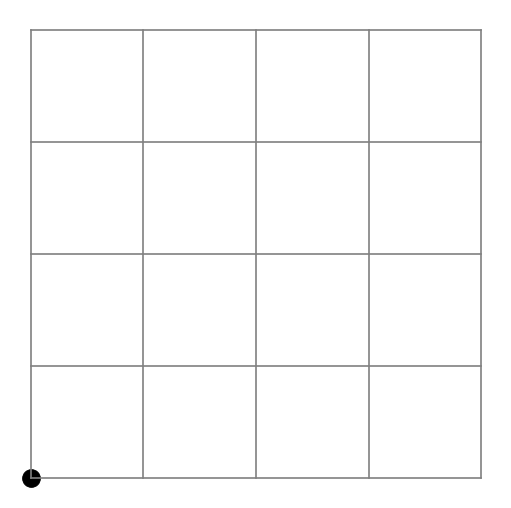

In [25]:
n = 5
ticks = np.arange(0, n, 1)
fig = plt.figure(figsize=(8, 8), dpi=80)
ax = plt.axes()


for x in range(n):
    for y in range(n):
        if x == 0:
            ax.plot([0, n - 1], [y, y], 'grey')
        if y == 0:
            ax.plot([x, x], [0, n - 1], 'grey')

ax.scatter([0], [0], color='black', s=250)

ax.set_xticks(ticks)
ax.set_yticks(ticks)


plt.axis('off')
plt.show()

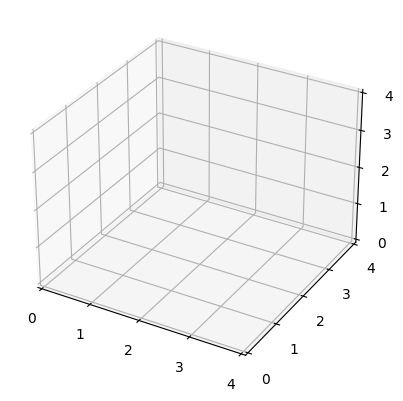

In [3]:
fig = plt.figure()
ticks = np.arange(0, 5, 1)
ax = plt.axes(projection='3d')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)